In [1]:
%matplotlib inline

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

sns.set(style="whitegrid")

# Advanced

Here are a few advanced techniques for EDA. Except for color, you're unlikely to need them in this course.

## Color

It's incredibly difficult to compare three or more variables using a static medium. While it is possible to compare three variables using interactive plots, these are not without their drawbacks. The major drawback is that any particular view is just as deceiving as having had a single 3d view. This means that you can only experience them while you are moving the chart.

Another approach is to use color, if one of the variables is categorical. You simply assign a color to each category.

In [6]:
random.seed(57483249)

data = pd.DataFrame(np.concatenate([stats.norm.rvs( 90.0, 9.0, 100), 
                                    stats.norm.rvs(120.0, 12.0, 100)]))
data.columns = ["X"]
data["Y"] = data["X"].apply(lambda x: 5.0 + 0.4 * x + 
                            stats.norm.rvs( 0.0, 8.0, 1)[0])
data["Z"] = ["a"] * 100 + ["b"] * 100
data.head()

X          Y  Z
0  80.587944  30.132633  a
1  87.156102  25.579921  a
2  84.500463  39.018190  a
3  86.698767  25.205657  a
4  83.132429  42.103680  a

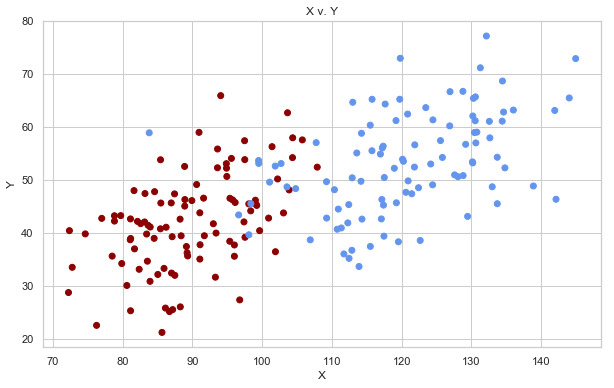

In [8]:
figure = plt.figure(figsize=(10, 6))

colors = data["Z"].apply(lambda x: "DarkRed" if x == "a" 
                         else "CornflowerBlue")

axes = figure.add_subplot(1, 1, 1)
axes.scatter( data[ "X"], data["Y"], marker="o", color=colors)
axes.set_title("X v. Y")
axes.set_xlabel( "X")
axes.set_ylabel( "Y")

plt.show()
plt.close()

## Subsetting

As you begin to explore the data in the context of your question or problem, there may arise subsets of data that strike your interest. You may only be interested in repeat customers or women or men or people with a BMI over 25.

You can take your entire data set, subset it to various groups of interest and repeat the process of EDA all over again. Do the relationships still hold?

## Projections

When we look a scatterplot of a variable like height versus weight, we are looking at the variables in their measured dimensions on the standard Cartesian plane. This may not, however, be the best space for viewing the variation in the data.

Principal Component Analysis (PCA) first projects a data set into its dimension of highest variance and successively finds orthogonal dimensions that explain the remaining variance. The results are thus a "change of basis" for the data (if you remember what a "change of basis" is from linear algebra, that might help). It accomplishes this by eigen-decomposition of the correlation matrix after mean centering and normalizing of the data or singular value decomposition of the data matrix.

When you're done, you have N linear combinations of your variables (the principal components) where the weights on each principle component are the *loadings* for each variable and the tranformed data is called the *scores*. The downside to PCA is that the new *basis* is a linear combination of variables and not easy to explain or understand.

PCA can only be used with numerical data. If there are only a few categorical variables, color might help or you may need to rely on small multiples. Additionally, PCA is often overused.  You almost never need it for modeling until you reach upwards of 100s or 1000s of variables. Additionally, the principal components are difficult to explain. We will talk more about PCA in a later chapter.

Another projection is MDS (Multi-Dimensional Scaling). If you have a similarity (or distance) metric for your observations, you can use MDS to project the entire dataset onto a flat plane. Unfortunately, MDS is right up there with Word Clouds in terms of true usefulness.

# Lattice Plot 

One plot you will sometimes see in EDA is the Lattice plot (it goes by a variety of other names as well, Matrix plot, etc). The Lattice plot will automatically create a set of pairwise comparisons between all variables:

![Lattice Plot](../resources/lattice_plot_example.png)

While the Lattice plot above is only for numerical variables, there are Lattice plots that handle categorical variables as well. Because the off diagonal is a mirror image of the main, we often do something different with the off diagonal. Here the library is added a LOWESS line. In other libraries, they show the correlation coefficent.

So why not use them?

First, they don't scale very well. The example above has 8 variables and that is probably already too many. Second, there's a lot of "gee whiz" going on here. It *looks* impressive but it violates one of the goals of EDA as presented herein, a *methodical* exploration of your data.

The method of EDA described herein asks you to examine each variable individually, making notes about the variable, your domain knowledge, and what you think you'll find. You then look at the variable and make notes about what you did find. If someone goes to read your analysis, it should all fit, more or less, on one page/screen so that they don't have to scroll back and forth (very much). You then complete the process for pairwise comparisons, guided by correlation analysis, domain knowledge and your problem/question.

In contrast, how would you do the same thing with the Lattice plot? Do you describe all the expected pairwise comparisons? If you see something interesting, you make a note of it. If you don't make a note of it, did you not see something or did you not look? As someone reads your notes, do they have to keep scrolling back further and further to see what you saw?

At most, you might consider a Lattice Plot at the *end* of your pairwise exploration to summarize the main relationships you found but it should not be the start of your EDA.